In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### Get chromatin regions from multiome data

In [10]:
DATA_DIR = "/Users/xzeng/Desktop/kaggle/open-problems-multimodal"
FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")

multi_train_x = pd.read_hdf(FP_MULTIOME_TRAIN_INPUTS, start=0, stop=10)
column_names = multi_train_x.columns.to_series()
peak_regions = column_names.str.split(r':|-',expand=True)

In [11]:
peak_regions = peak_regions.astype({1: 'int32',
                                    2: 'int32'},
                                    copy=False)
peak_regions.head(5)

,0,1,2
gene_id,,,
GL000194.1:114519-115365,GL000194.1,114519,115365
GL000194.1:55758-56597,GL000194.1,55758,56597
GL000194.1:58217-58957,GL000194.1,58217,58957
GL000194.1:59535-60431,GL000194.1,59535,60431
GL000195.1:119766-120427,GL000195.1,119766,120427


In [13]:
# remove 'chr' to match the chromsome
peak_regions = peak_regions.replace('chr', '', regex=True)

These three columns are chromosome name, start site and end site respectively.

In [14]:
# save the coordinate information to bed format for extracting DNA sequences
peak_regions.to_csv('../results/peak_regions.bed',sep='\t', index=False, header=False)

Statistical analysis of peaks

In [46]:
peak_regions['length'] = peak_regions[2] - peak_regions[1]

<function matplotlib.pyplot.show(close=None, block=None)>

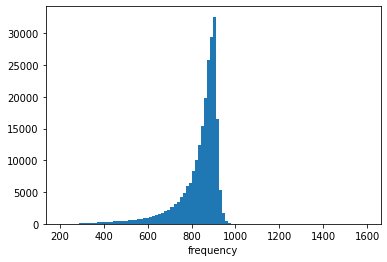

In [53]:
plt.hist(peak_regions.length, 
         bins=100)
plt.xlabel('peak length')
plt.xlabel('frequency')
plt.show

In [58]:
peak_regions[peak_regions['length'] > 1000].shape

(45, 4)

### Get DNA sequences from chromtain regions.

* According to https://www.kaggle.com/competitions/open-problems-multimodal/data, the reference genome for this dataset is GRCh38(release on July 7, 2020). 
* The fasta and gtf file of reference genome were downloaded by the url below     
http://ftp.ensembl.org/pub/release-98/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_32/gencode.v32.primary_assembly.annotation.gtf.gz 
* The index of reference genome was built by *samtools*
* The sequences of chromatin regions were extract from reference genome by *bedtools*

In [6]:
!bedtools getfasta


Tool:    bedtools getfasta (aka fastaFromBed)
Version: v2.30.0
Summary: Extract DNA sequences from a fasta file based on feature coordinates.

Usage:   bedtools getfasta [OPTIONS] -fi <fasta> -bed <bed/gff/vcf>

Options: 
	-fi		Input FASTA file
	-fo		Output file (opt., default is STDOUT
	-bed		BED/GFF/VCF file of ranges to extract from -fi
	-name		Use the name field and coordinates for the FASTA header
	-name+		(deprecated) Use the name field and coordinates for the FASTA header
	-nameOnly	Use the name field for the FASTA header
	-split		Given BED12 fmt., extract and concatenate the sequences
			from the BED "blocks" (e.g., exons)
	-tab		Write output in TAB delimited format.
	-bedOut		Report extract sequences in a tab-delimited BED format instead of in FASTA format.
			- Default is FASTA format.
	-s		Force strandedness. If the feature occupies the antisense,
			strand, the sequence will be reverse complemented.
			- By default, strand information is ignored.
	-fullHeader	Use full fast

In [15]:
!bedtools getfasta -fi /Users/xzeng/Desktop/kaggle/reference/Homo_sapiens.GRCh38.dna.primary_assembly.fa \
                   -bed /Users/xzeng/Desktop/kaggle/results/peak_regions.bed \
                   -fo /Users/xzeng/Desktop/kaggle/results/peak_regions.fa

In [ ]:
# Run word2vec to transfer the DNA sequences into vectors
#It might takes time!
!python dna2vec.py -i ../results/peak_regions.fa -k 6